# MultiCamera Paper Results Generation and Plotting

In [42]:
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import json
import pandas as pd
import numpy as np

In [43]:
aspect = 1.4
height = 2
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}

params = {'axes.labelsize': 'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

In [44]:
import sys
sys.path.append("../..") # Adds higher directory to python modules path.

from utilitysimv4 import Camera, InferenceJob, TrainingJob, MultiPeriodSimulator, fair_naive_scheduler, fair_dumb_scheduler, fair_sco_scheduler, fair_random_scheduler, inference_only_scheduler, single_camera_naive, get_optimus_fn, thief_sco_scheduler, single_camera_optimizer, get_tanh_fn, get_linear_fn, get_infer_profile, get_tanh_fn, simulator, thief_scheduler, fair_scheduler

In [45]:
# !!!!!!! CONFIGURE THESE PARAMS !!!!!!!!
dataset = 'cityscapes' #'cityscapes'
pred_mode = 'datadist'# 'datadist'

In [46]:
PROFILE_DIR = '/home/romilb/research/msr/results/profiling/new_profiling/{}/meta/profiles'.format(dataset)
INFERENCE_PROFILE_PATH = '../real_inference_profiles.csv'
INFERENCE_MAX_DEFAULT = 0.25
PLOT_PATH = './camready_plots/'
os.makedirs(PLOT_PATH, exist_ok=True)

In [47]:
l=os.listdir(PROFILE_DIR)
cities=[x.split('.')[0] for x in l]
print(cities)

['aachen', 'tubingen', 'zurich', 'bremen', 'bochum', 'cologne', 'dusseldorf', 'darmstadt', 'monchengladbach', 'stuttgart']


In [48]:
all_data = pd.read_csv('data_eval_sensitivity_errors_all_data_{}_{}.csv'.format(dataset, pred_mode))

In [49]:
x=all_data[(all_data['sched']=='thief') & (all_data['res']==4) & (all_data['period']==100) & (all_data['use_oracle']==True)]# & (citywise_data['city']=="phx-21-40")]

In [50]:
tasks = [t for t in x.mean().keys() if "task" in t]

# Plotting

In [51]:
styles = ['^-', 'v-', 'o-']

In [52]:
PERIOD=100
USE_ORACLE_INFO = True
d = all_data
d = d[d['use_oracle'] == USE_ORACLE_INFO]
d = d[d['period'] == PERIOD]
scheds = ['inference_only', 'fair_dumb','thief']
labels = ["No-retrain", "Fair Scheduler", "Ekya"]

In [53]:
# Group data and create overall_mean col
plot_data = d.groupby(['sched', 'res', 'error_rate']).mean()
tasks = [x for x in plot_data.columns if "task_" in x]
plot_data['overall_mean'] = plot_data[tasks].mean(axis=1)

In [54]:
plot_data

time    task_1    task_2    task_3    task_4  \
sched          res error_rate                                                 
fair_dumb      1   0             50  0.290368  0.317081  0.295058  0.310609   
                   5             50  0.310290  0.336712  0.295058  0.310609   
                   10            50  0.290368  0.365944  0.295058  0.350615   
                   20            50  0.298440  0.382487  0.295058  0.311448   
                   50            50  0.300821  0.338094  0.322459  0.326741   
               2   0             50  0.483029  0.518176  0.483812  0.503763   
                   5             50  0.478023  0.505517  0.499895  0.501195   
                   10            50  0.468533  0.514029  0.492671  0.501195   
                   20            50  0.475256  0.533727  0.476102  0.538980   
                   50            50  0.503589  0.521691  0.509518  0.515576   
               4   0             50  0.653040  0.706959  0.655294  0.678797   
                   5             50  0.632032  0.689551  0.645965  0.682604   
                   10            50  0.654386  0.695050  0.647549  0.705730   
                   20            50  0.680668  0.723237  0.634427  0.697823   
                   50            50  0.673640  0.693784  0.656217  0.674956   
               8   0             50  0.707957  0.744402  0.688687  0.737037   
                   5             50  0.666220  0.721936  0.680061  0.715161   
                   10            50  0.697940  0.735589  0.680486  0.721196   
                   20            50  0.718356  0.741718  0.682896  0.733871   
                   50            50  0.695209  0.725379  0.689094  0.740819   
inference_only 1   0             50  0.468533  0.505517  0.476102  0.501195   
                   5             50  0.468533  0.505517  0.476102  0.501195   
                   10            50  0.468533  0.505517  0.476102  0.501195   
                   20            50  0.468533  0.505517  0.476102  0.501195   
                   50            50  0.468533  0.505517  0.476102  0.501195   
               2   0             50  0.623609  0.672833  0.633683  0.667081   
                   5             50  0.623609  0.672833  0.633683  0.667081   
                   10            50  0.623609  0.672833  0.633683  0.667081   
                   20            50  0.623609  0.672833  0.633683  0.667081   
                   50            50  0.623609  0.672833  0.633683  0.667081   
               4   0             50  0.659902  0.711992  0.670563  0.705905   
                   5             50  0.659902  0.711992  0.670563  0.705905   
                   10            50  0.659902  0.711992  0.670563  0.705905   
                   20            50  0.659902  0.711992  0.670563  0.705905   
                   50            50  0.659902  0.711992  0.670563  0.705905   
               8   0             50  0.659902  0.711992  0.670563  0.705905   
                   5             50  0.659902  0.711992  0.670563  0.705905   
                   10            50  0.659902  0.711992  0.670563  0.705905   
                   20            50  0.659902  0.711992  0.670563  0.705905   
                   50            50  0.659902  0.711992  0.670563  0.705905   
thief          1   0             50  0.466903  0.486288  0.461845  0.502829   
                   5             50  0.451320  0.486288  0.468396  0.490180   
                   10            50  0.454155  0.488511  0.468396  0.496254   
                   20            50  0.456558  0.483037  0.462740  0.488203   
                   50            50  0.398349  0.475781  0.453398  0.472967   
               2   0             50  0.634739  0.665250  0.621962  0.681362   
                   5             50  0.634452  0.656214  0.634167  0.668509   
                   10            50  0.640383  0.656175  0.635906  0.662432   
                   20            50  0.619846  0.639246  0.608791  0.664874   
  

In [55]:
mean_acc_data = plot_data['overall_mean'].mean(level=['sched', 'res', 'error_rate']).unstack(level=['sched', 'error_rate'])

In [56]:
mean_acc_data

sched      fair_dumb                                         inference_only  \
error_rate        0         5         10        20        50             0    
res                                                                           
1           0.302295  0.310206  0.320069  0.321395  0.317295       0.486555   
2           0.494559  0.493212  0.493451  0.501718  0.508862       0.647596   
4           0.675213  0.662381  0.678158  0.678044  0.680029       0.685285   
8           0.720778  0.697119  0.707689  0.713491  0.707237       0.685285   

sched                                                  thief            \
error_rate        5         10        20        50        0         5    
res                                                                      
1           0.486555  0.486555  0.486555  0.486555  0.478587  0.472567   
2           0.647596  0.647596  0.647596  0.647596  0.653933  0.648996   
4           0.685285  0.685285  0.685285  0.685285  0.756630  0.748028   
8           0.685285  0.685285  0.685285  0.685285  0.771234  0.762156   

sched                                     
error_rate        10        20        50  
res                                       
1           0.476478  0.471181  0.452149  
2           0.647999  0.629780  0.602025  
4           0.739476  0.730506  0.722284  
8           0.760772  0.748811  0.733306

In [57]:
#mean_acc_data['thief'][50][4] = XYZ

In [58]:
mean_acc_data.columns.get_level_values(0)

Index(['fair_dumb', 'fair_dumb', 'fair_dumb', 'fair_dumb', 'fair_dumb',
       'inference_only', 'inference_only', 'inference_only', 'inference_only',
       'inference_only', 'thief', 'thief', 'thief', 'thief', 'thief'],
      dtype='object', name='sched')

In [59]:
error_rates = [0,5,10,20,50]
scheds = [['fair_dumb', 0], ['inference_only', 0], *[['thief', x] for x in error_rates]]
labels = ['Fair Scheduler', 'No-retrain', *['Ekya - {}% Error'.format(x) for x in error_rates]]

### Bar Plot

In [60]:
mean_acc_data

sched      fair_dumb                                         inference_only  \
error_rate        0         5         10        20        50             0    
res                                                                           
1           0.302295  0.310206  0.320069  0.321395  0.317295       0.486555   
2           0.494559  0.493212  0.493451  0.501718  0.508862       0.647596   
4           0.675213  0.662381  0.678158  0.678044  0.680029       0.685285   
8           0.720778  0.697119  0.707689  0.713491  0.707237       0.685285   

sched                                                  thief            \
error_rate        5         10        20        50        0         5    
res                                                                      
1           0.486555  0.486555  0.486555  0.486555  0.478587  0.472567   
2           0.647596  0.647596  0.647596  0.647596  0.653933  0.648996   
4           0.685285  0.685285  0.685285  0.685285  0.756630  0.748028   
8           0.685285  0.685285  0.685285  0.685285  0.771234  0.762156   

sched                                     
error_rate        10        20        50  
res                                       
1           0.476478  0.471181  0.452149  
2           0.647999  0.629780  0.602025  
4           0.739476  0.730506  0.722284  
8           0.760772  0.748811  0.733306

/home/romilb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


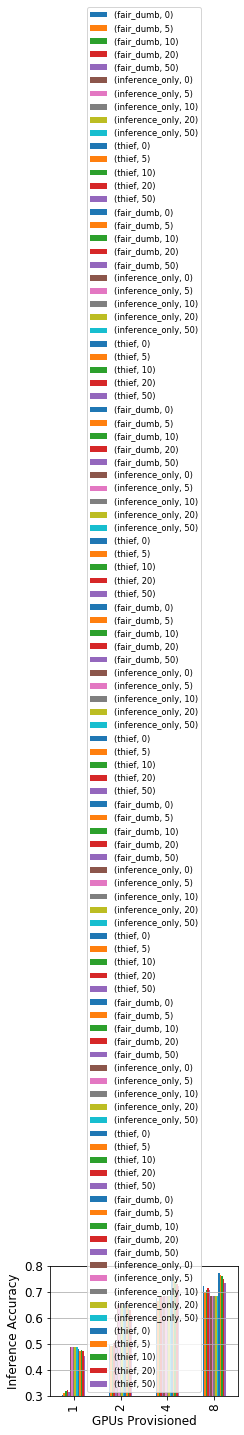

In [20]:
fig = plt.figure(figsize=[aspect*height*1.2, height*1.2])
ax = plt.gca()
for i, (l0, l1) in enumerate(scheds):
    mean_acc_data.plot(ax=ax, kind='bar')
#lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2, prop={'size': 'small'})
ax.legend(prop={'size': 'small'})
ax.set_ylabel('Inference Accuracy')
ax.set_xlabel('GPUs Provisioned')

ax.set_ylim([0.3,0.8])

# x_tick_range = np.arange(1,9,1)
# ax.set_xticks(x_tick_range)
    
plt.tight_layout()
ax.yaxis.grid(True)
plt.savefig(os.path.join(PLOT_PATH, "sensitivity_profileerrors_{}.pdf".format(dataset)), bbox_inches='tight')

## Line Plot

In [61]:
error_rates = [5,0,10,20,50]
scheds = [['fair_dumb', 0], *[['thief', x] for x in error_rates]]
labels = ['Uniform (C2, 50%)', *[r'Ekya $\epsilon$={}% '.format(x) for x in error_rates]]

In [62]:
mean_acc_data

sched      fair_dumb                                         inference_only  \
error_rate        0         5         10        20        50             0    
res                                                                           
1           0.302295  0.310206  0.320069  0.321395  0.317295       0.486555   
2           0.494559  0.493212  0.493451  0.501718  0.508862       0.647596   
4           0.675213  0.662381  0.678158  0.678044  0.680029       0.685285   
8           0.720778  0.697119  0.707689  0.713491  0.707237       0.685285   

sched                                                  thief            \
error_rate        5         10        20        50        0         5    
res                                                                      
1           0.486555  0.486555  0.486555  0.486555  0.478587  0.472567   
2           0.647596  0.647596  0.647596  0.647596  0.653933  0.648996   
4           0.685285  0.685285  0.685285  0.685285  0.756630  0.748028   
8           0.685285  0.685285  0.685285  0.685285  0.771234  0.762156   

sched                                     
error_rate        10        20        50  
res                                       
1           0.476478  0.471181  0.452149  
2           0.647999  0.629780  0.602025  
4           0.739476  0.730506  0.722284  
8           0.760772  0.748811  0.733306

In [63]:
aspect = 1.4
height = 2.5
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}

params = {'axes.labelsize': 'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

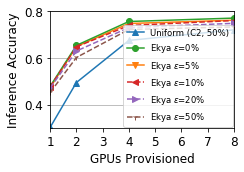

In [64]:
styles = ['^-', 'v-', 'o-', '<--', '>--', '1--', '2--']
fig = plt.figure(figsize=[aspect*height, height])
ax = plt.gca()
for i, (l0, l1) in enumerate(scheds):
    mean_acc_data[l0][l1].plot(ax=ax, label=labels[i], style=styles[i], ms=6)
#lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=1, prop={'size': 'small'})
#lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=3, prop={'size': 8.5})
ax.legend(ncol=1, prop={'size': 7.5})
handles, labels = ax.get_legend_handles_labels()

# Reorder to get 0 up
a,b = handles[1], labels[1]
handles[1], labels[1] = handles[2], labels[2]
handles[2], labels[2] = a,b
ax.legend(handles, labels, ncol=1, prop={'size': 8.5}, borderaxespad=0.1)#, loc="lower center", bbox_to_anchor=(0,1.02,1,0.2))#, handletextpad=0.1)#, borderpad=0.1)

ax.set_ylabel('Inference Accuracy')
ax.set_xlabel('GPUs Provisioned')

ax.set_ylim([0.3,0.8])

x_tick_range = np.arange(1,9,1)
ax.set_xticks(x_tick_range)
    
plt.tight_layout()
ax.yaxis.grid(True)
plt.savefig(os.path.join(PLOT_PATH, "sensitivity_profileerrors_{}.pdf".format(dataset)), bbox_inches='tight')

# Plot Delta

In [21]:
d = timeseries_data[tasks].mean(level=['sched']).transpose()
d = d[scheds]

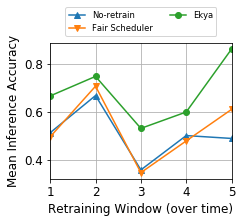

In [22]:
fig = plt.figure(figsize=[aspect*height, height])
ax = plt.gca()

ax = d.plot(y=scheds, style = styles, ax=ax,
            label = labels)
lgd = ax.legend(loc="lower center", bbox_to_anchor=(0,1.02,1,0.2), ncol=2, prop={'size': 'small'})
ax.set_ylabel('Mean Inference Accuracy')
ax.set_xlabel('Retraining Window (over time)')
ax.set_xticks(range(0,5))
ax.set_xticklabels(range(1,6))
ax.grid(True)
plt.savefig(os.path.join(PLOT_PATH, "multicam_taskwise_acc_{}_{}_{}.pdf".format(city, NUM_RES, dataset)), bbox_inches='tight')

# Cost plot

In [34]:
mean_acc_data = plot_data['overall_mean'].mean(level=['sched', 'res', 'city']).unstack(level='res')
#mean_acc_data = mean_acc_data.reorder_levels(['city', 'sched'])

In [37]:
cost_data = mean_acc_data.groupby(['city','sched']).mean()

In [51]:
cost_data.index

MultiIndex(levels=[['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'monchengladbach', 'stuttgart', 'tubingen', 'zurich'], ['fair_dumb', 'fair_sco', 'inference_only', 'thief']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['city', 'sched'])

In [56]:
cost_data[[4,8]]

res                                    4         8
city            sched                             
aachen          fair_dumb       0.697024  0.736173
                fair_sco        0.754116  0.782585
                inference_only  0.715068  0.715068
                thief           0.766142  0.775399
bochum          fair_dumb       0.884134  0.918698
                fair_sco        0.909117  0.921592
                inference_only  0.892308  0.892308
                thief           0.915625  0.922758
bremen          fair_dumb       0.722770  0.747573
                fair_sco        0.760945  0.784206
                inference_only  0.747573  0.747573
                thief           0.781691  0.799095
cologne         fair_dumb       0.613628  0.641077
                fair_sco        0.646182  0.669072
                inference_only  0.635000  0.635000
                thief           0.685731  0.702960
darmstadt       fair_dumb       0.561269  0.624780
                fair_sco        0.606337  0.634818
                inference_only  0.550000  0.550000
                thief           0.669070  0.687533
dusseldorf      fair_dumb       0.785018  0.816071
                fair_sco        0.813381  0.832084
                inference_only  0.810405  0.810405
                thief           0.810607  0.823666
monchengladbach fair_dumb       0.741947  0.782970
                fair_sco        0.762917  0.790614
                inference_only  0.748000  0.748000
                thief           0.809738  0.817377
stuttgart       fair_dumb       0.668916  0.700205
                fair_sco        0.745092  0.758162
                inference_only  0.690244  0.690244
                thief           0.768987  0.796608
tubingen        fair_dumb       0.550805  0.641409
                fair_sco        0.636038  0.651385
                inference_only  0.559494  0.559494
                thief           0.678778  0.688613
zurich          fair_dumb       0.526615  0.598821
                fair_sco        0.602078  0.669213
                inference_only  0.504762  0.504762
                thief           0.679929  0.698331

# Number of streams plot

In [58]:
all_data = pd.read_csv('data_eval_multicam_varyingcam_all_data_{}_{}.csv'.format(dataset, pred_mode))

In [59]:
all_data

,time,task_1,task_2,task_3,task_4,task_5,city,res,period,use_oracle,sched,num_cams
0,0,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
1,1,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
2,2,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
3,3,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
4,4,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
5,5,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
6,6,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
7,7,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
8,8,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
9,9,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1


In [62]:
PERIOD=100
USE_ORACLE_INFO = False
d = all_data
d = d[d['use_oracle'] == USE_ORACLE_INFO]
d = d[d['period'] == PERIOD]
scheds = ['inference_only', 'fair_dumb','thief']
labels = ["No-retrain", "Fair Scheduler", "Ekya"]

In [63]:
d

,time,task_1,task_2,task_3,task_4,task_5,city,res,period,use_oracle,sched,num_cams
0,0,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
1,1,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
2,2,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
3,3,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
4,4,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
5,5,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
6,6,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
7,7,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
8,8,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1
9,9,0.511905,0.666667,0.357143,0.5,0.488095,zurich_0,1,100,False,fair_dumb,1


In [ ]:
# Group data and create overall_mean col
plot_data = d.groupby(['sched', 'res', 'city']).mean()
tasks = [x for x in plot_data.columns if "task_" in x]
plot_data['overall_mean'] = plot_data[tasks].mean(axis=1)